<a href="https://colab.research.google.com/github/aaravpanchal/EDA-on-Airbnb-NYC-2019-Database/blob/main/EDA_AIRBNB_NYC_2019_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  EDA on AirBNB NYC



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Made by -**Aarav Panchal 


# **Project Summary -**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

Project WorkFlow:

*  Importing Libraries

*  Loading the dataset

*  Data Cleaning and Data Wrangling

*  EDA on features

*  Conclusion

Libraries I will use to perform these:

*  Data wrangling : Numpy and Pandas

*  Data Visualization : Matplotlib and Seaborn


# **GitHub Link -**

https://github.com/aaravpanchal/EDA-on-Airbnb-NYC-2019-Database

# **Problem Statement**


We need to derive some useful insights from the database. For that we will be using Data Visualization tools followed by Data Cleaning and Data Wrangling.

EDA Learnings : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#### **Define Your Business Objective?**

Useful Insights can hepl stakeholders to create better user expericene and genereate more reveneue as well.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#importing the required libraries for our analysis
import numpy as np 
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
#lets load the data
newdf=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
newdf.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Total raws are",newdf.shape[0])
print("Total Columns are" ,len(newdf.columns))

Total raws are 48895
Total Columns are 16


### Dataset Information

In [6]:
# Dataset Info
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
newdf.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
newdf.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

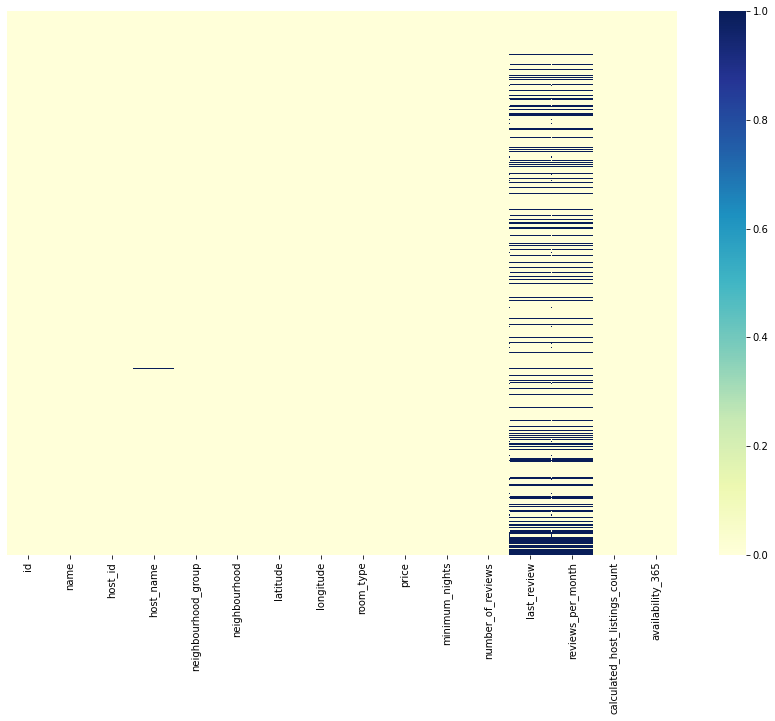

In [9]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(newdf.isnull(), yticklabels=False, cbar=True, cmap='YlGnBu')

### What did you know about your dataset?

Our data has around 49 thousand rows and 16 features. last_review and reviews_per month is highly missing on the data around 20%.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
newdf.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
# Dataset Describe
newdf.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### Variables Description 

*  id: It is an unique id given to the property listed in Airbnb NYC which is a numerical variable.

*  name: It represents the name of the airbnb listed property which is a categorical feature.

*  host_id: This is an unique id given to the host of the property which is a numerical variable.

*  host_name: The name of the host of the property listed which is a categorical variable.

*  neighbourhood_group: This represents a big neighbourhood inside which there are many mini neighbourhoods which is a categorical variable.
  
*  neighbourhood: This represents all the mini neighbourhoods present in NYC which is another categorical variable.

*  latitude: latitude coordinates

*  longitude: longitude coordinates

*  room_type: This represents the type of room in the listed property which is a categorical variable. There are three room types available in the data:

*  price: Represents the price per day of stay in the respective listed property which is a numerical variable.

*  minimum_nights: This represents the minimum number of nights a person has to pay for or stay in the property which is a numerical variable.

*  number_of_reviews: The number of reviews given to the property and the host which is a numerical variable.

*  last_review: The date of the last review given which is a datetime object.

*  reviews_per_month: The number of reviews given over a month to a property or the host which is a numerical variable

### Check Unique Values for each variable.

In [26]:
# Check Unique Values for each variable.
for i in newdf.columns:
  print("Unique values of",i,"is",newdf[i].nunique())
  

Unique values of id is 48895
Unique values of name is 47905
Unique values of host_id is 37457
Unique values of host_name is 11452
Unique values of neighbourhood_group is 5
Unique values of neighbourhood is 221
Unique values of latitude is 19048
Unique values of longitude is 14718
Unique values of room_type is 3
Unique values of price is 674
Unique values of minimum_nights is 109
Unique values of number_of_reviews is 394
Unique values of last_review is 1764
Unique values of reviews_per_month is 937
Unique values of calculated_host_listings_count is 47
Unique values of availability_365 is 366


## 3. ***Data Wrangling***

### Data Wrangling Code

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


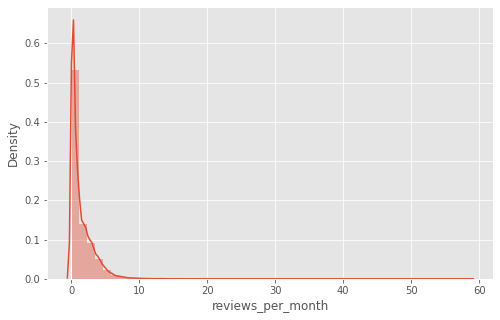

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
sns.distplot(newdf['reviews_per_month'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


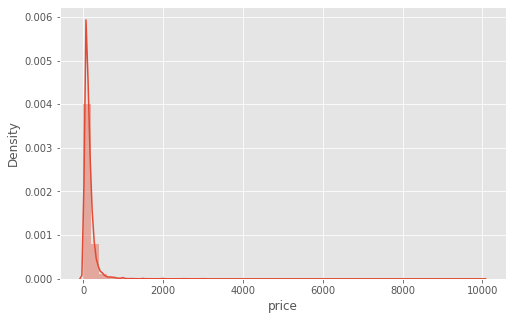

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
sns.distplot(newdf['price'])

In [4]:
#replacing missing values 
newdf.fillna({'reviews_per_month':newdf.reviews_per_month.median()}, inplace=True)
#removing unnecessary columns
newdf.drop(['id','last_review'],axis=1, inplace=True)
#replacing zero values in price column with the mean value
newdf['price'].replace({0 : newdf['price'].median()}, inplace = True)

### What all manipulations have you done and insights you found?

I have replaced null values in reviews per month with median as data was highly right skewed. 
Also, replaced 0 values of price with median as price cannot be zero.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

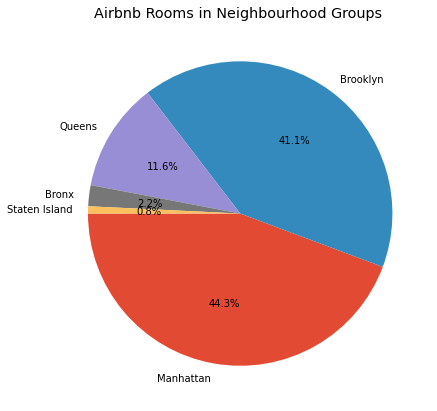

In [10]:
#rooms shares in each neighbourhood group 
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Airbnb Rooms in Neighbourhood Groups ")
g = plt.pie(newdf.neighbourhood_group.value_counts(), labels=newdf.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows us the distrubution of rooms in different neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

Most number of rooms are in Manhattan and Brooklyn
followed by Queens, Staten Island and Bronx

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Manhatten and Brooklyn are the major assets for the organization.

#### Chart - 2

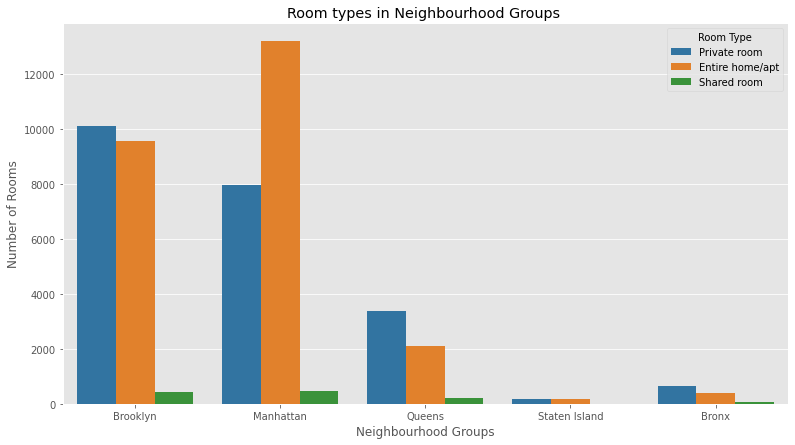

In [7]:
# room types in neighbourhood groups
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(data = newdf, x='neighbourhood_group', hue='room_type', palette="tab10")
plt.title("Room types in Neighbourhood Groups ")
plt.ylabel("Number of Rooms")
plt.xlabel("Neighbourhood Groups")
plt.legend(title='Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows us type of rooms available in different neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

Manhatten has most entire homes which is more than 12000 and Booklyn has most number of private rooms which are more than 10000. Staten Island has the minimum.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Manhatten has more demand of entire homes and Brooklyn has more demand of Private rooms.

#### Average price in neighbourhood groups

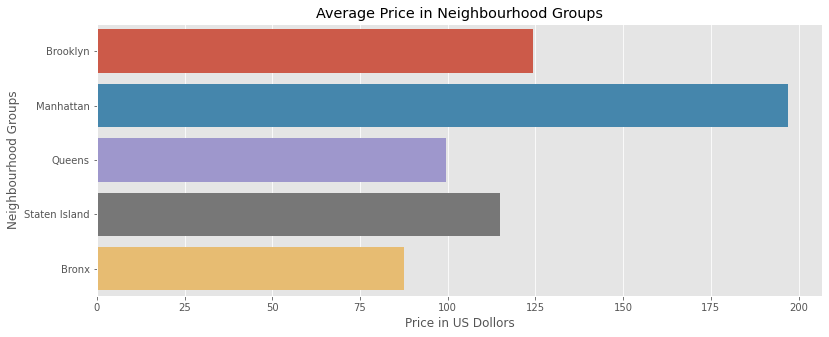

In [8]:
#average price in neighbourhood groups
plt.figure(figsize=(13,5))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(y = 'neighbourhood_group', x = 'price',data = newdf, ci = None)
plt.title("Average Price in Neighbourhood Groups")
plt.ylabel("Neighbourhood Groups")
plt.xlabel("Price in US Dollors")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows us average price in neighbourhood groups. price is major factor of the company.

##### 2. What is/are the insight(s) found from the chart?

Manhatten holds the maximum average price where as Bronx has the lowest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Manhatten is the most expensive city to stay and major capital of the company.

#### Average room type price

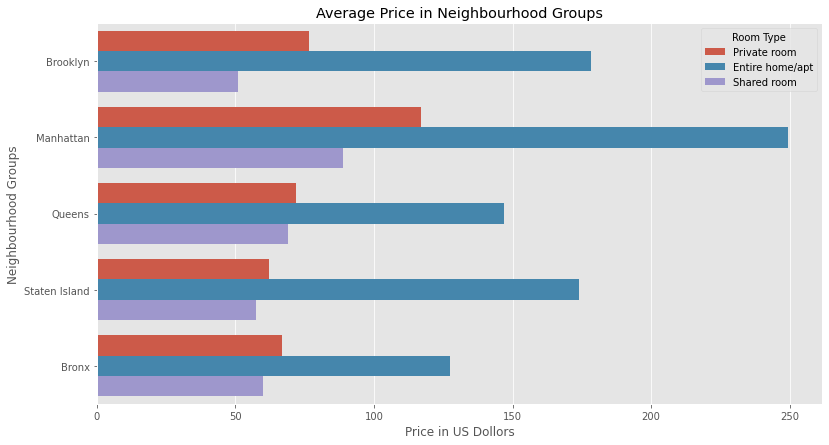

In [11]:
#average room type price 
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(y = 'neighbourhood_group', x = 'price',hue= "room_type", data = newdf, ci = None)
plt.title("Average Price in Neighbourhood Groups")
plt.ylabel("Neighbourhood Groups")
plt.xlabel("Price in US Dollors")
plt.legend(title='Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows us Average price of room types in each neighbouhood group. 

##### 2. What is/are the insight(s) found from the chart?

Entire homes are most expensive in Manhatten despite of being highest in the city. Interestingly, Brookyn has highest number of Private rooms but still cheaper than Entire Homes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Entire homes are most expensive rooms to stay everywhere and are the major assets for the company.

#### Density of Neighbourhood Groups

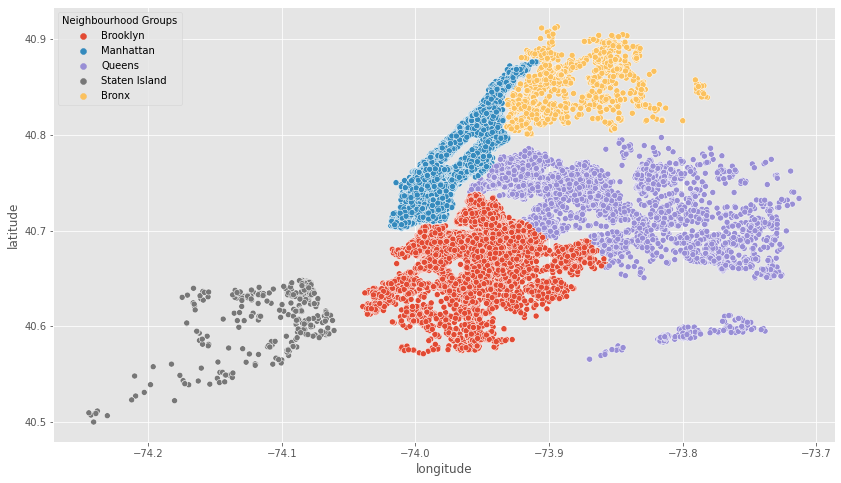

In [15]:
#traffic in neighbourhood groups
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
sns.scatterplot(data=newdf, x='longitude', y='latitude',hue = 'neighbourhood_group')
plt.legend(title='Neighbourhood Groups')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows us how dense the areas are in terms of number of Airbnbs in the area.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is a noticeable difference in traffic in different areas. Manhattan and Brooklyn are more crowded compared to the others. Manhattan is the most visited place in New York City because of its tourist spots. It is one of the reason why they have the highest number of Airbnb listings. Brooklyn also is really famous for its tourist spots. Both areas are densely populated and hence has more number of properties to be listed as an Airbnb. These maybe the reasons why there is a difference in traffic in these two areas compared to the others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

More number of Airbnbs can be established in lighly dense areas such Queens and Staten Islands.

#### Top 10 most expensive rooms

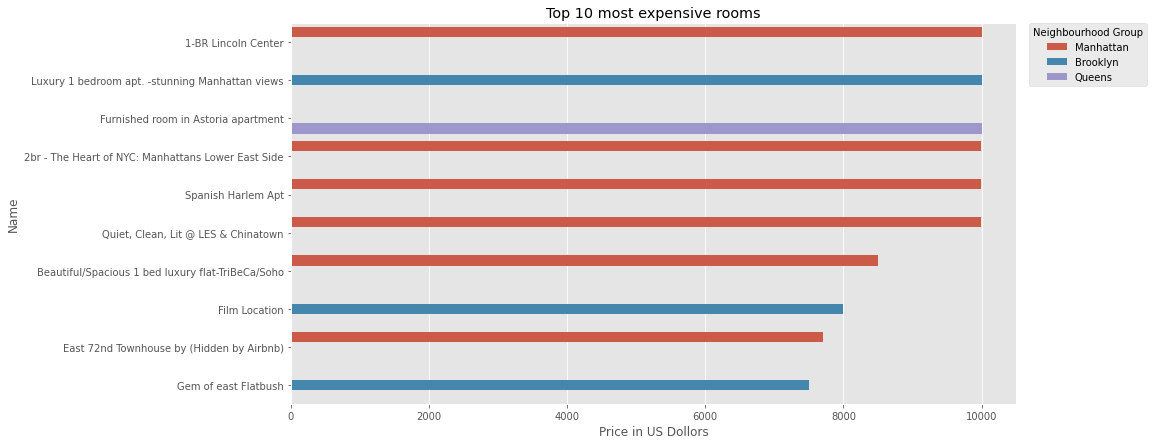

In [16]:
#Top 10 most expensive rooms
Top_listings=newdf.groupby(["name","neighbourhood","neighbourhood_group"]).price.max().sort_values(ascending=False).head(10).reset_index()
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
sns.barplot(y = 'name', x = 'price',hue= "neighbourhood_group", data = Top_listings)
plt.title("Top 10 most expensive rooms")
plt.ylabel("Name")
plt.xlabel("Price in US Dollors")
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.18, 1), loc='upper right', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the top 10 expensive rooms. 

##### 2. What is/are the insight(s) found from the chart?

Manhatten holds 60% of the list. That states, Manhatten is most expensive city in every term.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here we can see, Brooklyn also holds the position of most expensive place despite of havng very less number of listings, We can add more expensive airbnb here.

#### Top 10 Popular Hosts

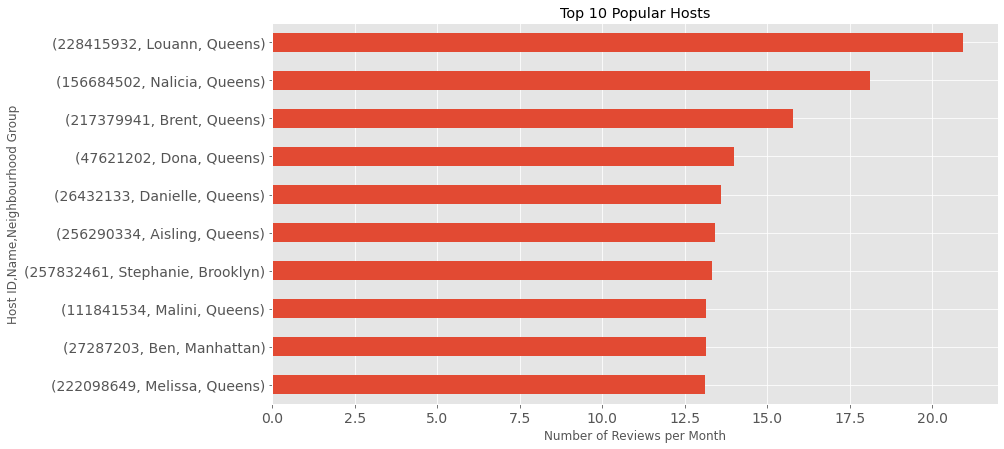

In [29]:
#most reviewed hosts
super_hosts=newdf.groupby(["host_id","host_name","neighbourhood_group"])["reviews_per_month"].mean().sort_values(ascending=False).head(10)
super_hosts.sort_values(ascending=True).plot.barh(figsize=(13,7),fontsize=14)
plt.style.use('ggplot')
plt.title("Top 10 Popular Hosts")
plt.ylabel("Host ID,Name,Neighbourhood Group")
plt.xlabel("Number of Reviews per Month")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows us the hosts who are giving best staying experiencee.

##### 2. What is/are the insight(s) found from the chart?

Surprisiingly, only 1 host hold the position from Manhatten and 8 hosts hold the position from Queens. Queens has giving best staying experience i would say.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mahattne staying experience should be improved as it is the major caital of Airbnb So that more revenue can be generated.

#### Top 10 Busiest Hosts

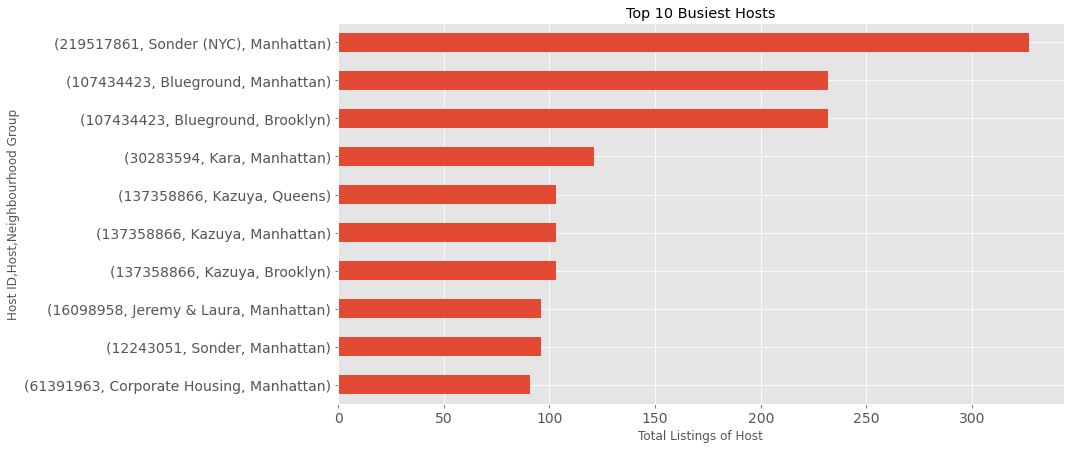

In [18]:
#top 10 busiest hosts
bussiest_host=newdf.groupby(["host_id","host_name","neighbourhood_group"])["calculated_host_listings_count"].max().sort_values(ascending=False).head(10)
bussiest_host.sort_values().plot.barh(figsize=(13,7),fontsize=14)
plt.style.use('tableau-colorblind10')
plt.title("Top 10 Busiest Hosts")
plt.ylabel("Host ID,Host,Neighbourhood Group")
plt.xlabel("Total Listings of Host")
plt.show()

##### 1. Why did you pick the specific chart?

The chart shows us the hosts are managing number of properties.

##### 2. What is/are the insight(s) found from the chart?

7 hosts are from Manhatten which is no surpise, as city has the most number of Airbnbs

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Busiest host provides maximum captital to business and should be rewarded for services.

#### Host Listing Count vs Number of reviews

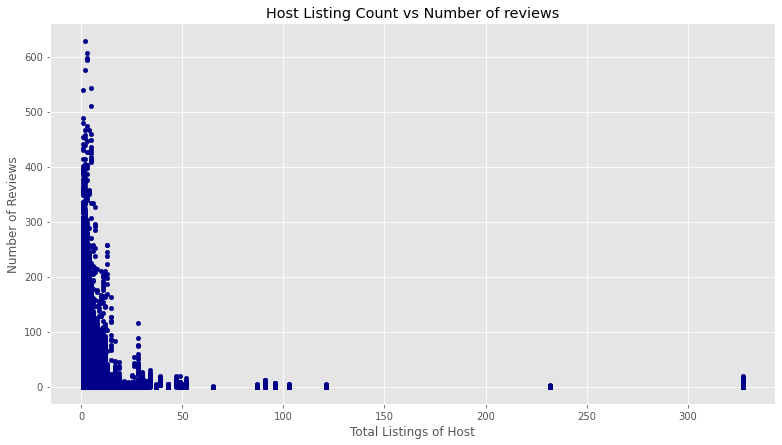

In [19]:
newdf.plot.scatter(x='calculated_host_listings_count', y='number_of_reviews',c='DarkBlue', figsize=(13, 7),
                              title = "Host Listing Count vs Number of reviews")
plt.style.use('tableau-colorblind10')
plt.ylabel("Number of Reviews")
plt.xlabel("Total Listings of Host")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows us optimal host listing counts where costumers experience is best.

##### 2. What is/are the insight(s) found from the chart?

We can see, more numbers of host listing decreases the number of reviews. That means, Hosts who are busiest the most are not able to provide good staying experirence to users.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A optimumal number of is diceded for hosts to hold the listing. I think 20 is a good number for best user experience.

#### Host Listing Count vs Price

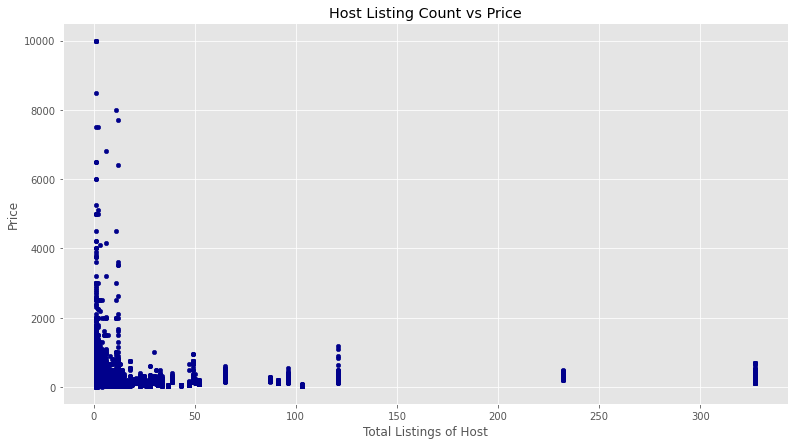

In [20]:
#Host Listing Count vs Price
newdf.plot.scatter(x='calculated_host_listings_count', y='price',c='DarkBlue', figsize=(13, 7),
                              title = "Host Listing Count vs Price")
plt.style.use('tableau-colorblind10')
plt.ylabel("Price")
plt.xlabel("Total Listings of Host")
plt.show()

##### 1. Why did you pick the specific chart?

this shows us how busiest hosts have kept price of their rooms.

##### 2. What is/are the insight(s) found from the chart?

Hosts who holds more than 20 properties have kept theri price lower. There can be two reasons for that either they hold small properties or they have higher margins.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

price is the major factor of Airbnb, keeping lower number of busiest host can increase in price. Aribnb has to hit a sweet spot.

#### Popularity in Neighbourhood Groups

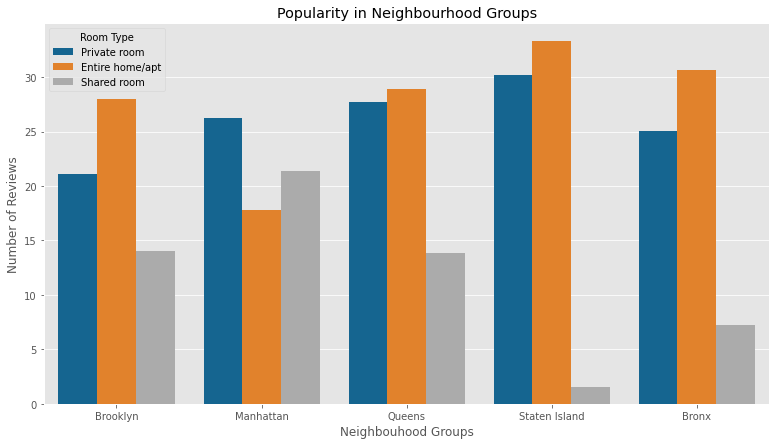

In [22]:
#popularity in neighbourhood groups
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews',hue= "room_type",ci=None, data = newdf)
plt.title("Popularity in Neighbourhood Groups")
plt.ylabel("Number of Reviews")
plt.xlabel("Neighbouhood Groups")
plt.legend(title='Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows us the Neighbourhood group that is providing best user experience.

##### 2. What is/are the insight(s) found from the chart?

staten Island provides the best for Entire villa and Manhattnen holds the lowest position despite of having maximum number of entire villa.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

User expeirence has to be improved in Manhatten.

#### Room Type vs Availabilty

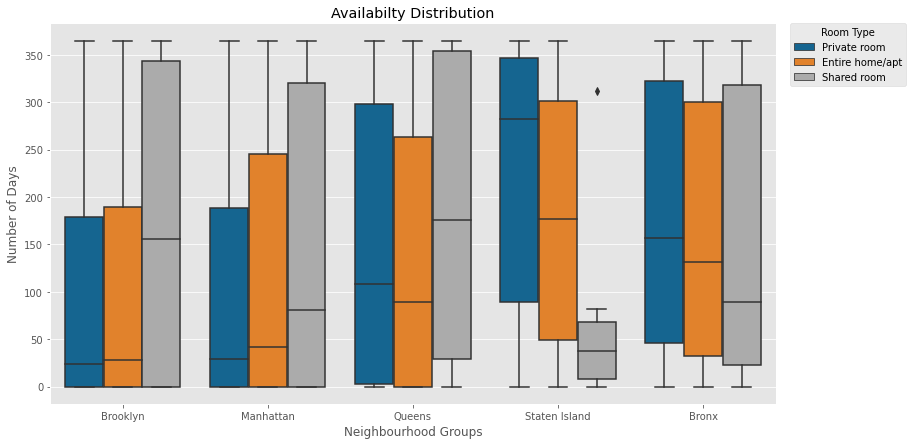

In [24]:
#Availabity of room types in neighbourhood groups
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(13,7))
sns.boxplot(y="availability_365",x ='neighbourhood_group',hue="room_type" ,data = newdf)
plt.title("Availabilty Distribution")
plt.ylabel("Number of Days")
plt.xlabel("Neighbourhood Groups")
plt.legend(title='Room Type', bbox_to_anchor=(1.18, 1), loc='upper right', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows availabilty of rooms throughout the year in every neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?

Aailabilty of Private rooms and Enitre home is less in Manhatten and Brooklyn as more demand these area. Staten Island has very less availabity of shared rooms.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Availabilty of private and entire homes should be increased in manhatten and brooklyn as these are the major asset of the company.

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Heatmap for NYC Airbnb')

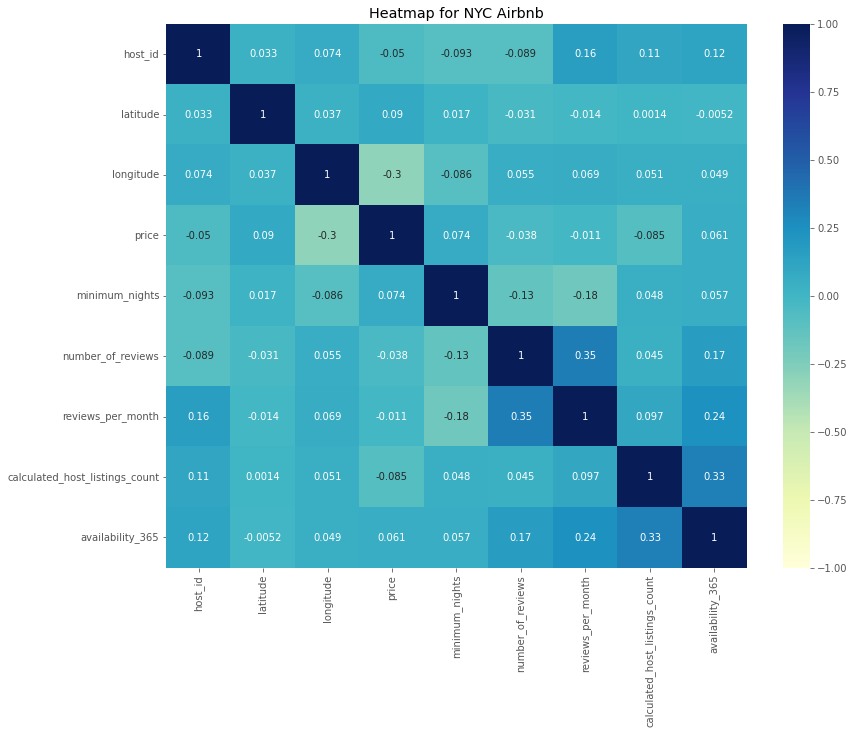

In [25]:
#Corelation of parameters
plt.figure(figsize=(13,10))
sns.heatmap(newdf.corr(method='kendall'), cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Heatmap for NYC Airbnb')

This doesnt give us desire information, lets check with mean values.

<ipython-input-26-52e510a6189b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corr_df=newdf.groupby(["neighbourhood_group","room_type"])["price","minimum_nights","reviews_per_month","calculated_host_listings_count","availability_365"].agg(["mean"]).reset_index()


Text(0.5, 69.0, 'Mean Parameters')

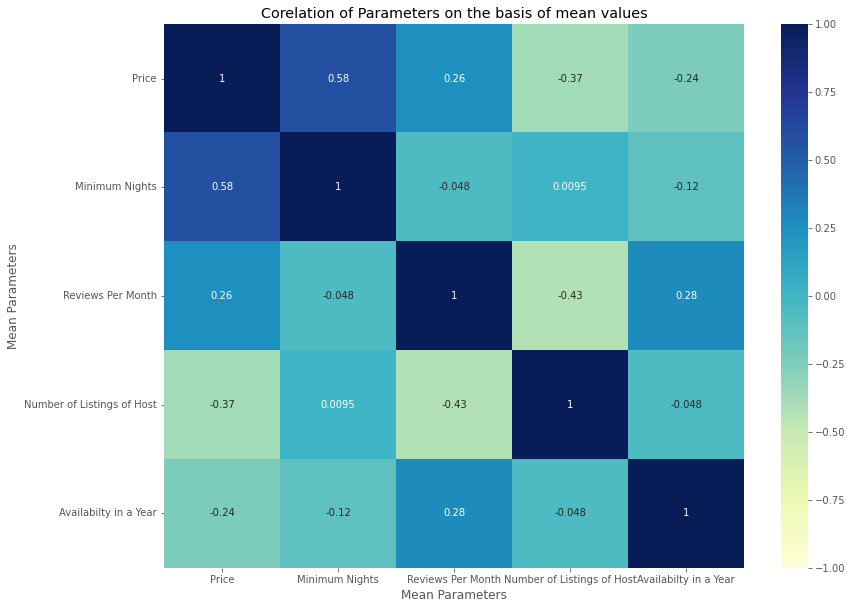

In [26]:
#Corelation of Average Parameters
corr_df=newdf.groupby(["neighbourhood_group","room_type"])["price","minimum_nights","reviews_per_month","calculated_host_listings_count","availability_365"].agg(["mean"]).reset_index()
plt.figure(figsize=(13,10))
labels = ["Price","Minimum Nights","Reviews Per Month","Number of Listings of Host","Availabilty in a Year"]
sns.heatmap(corr_df.corr(method='kendall'),xticklabels=labels,yticklabels=labels, cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Corelation of Parameters on the basis of mean values')
plt.ylabel("Mean Parameters")
plt.xlabel("Mean Parameters")

##### 1. Why did you pick the specific chart?

this chart helps us to check correlation between features.

##### 2. What is/are the insight(s) found from the chart?

Here we can conclude that, price shows linear positive relation with minimum nights hosted, which means rooms which are high in demand are kept higher in price. 

#### Chart - 15 - Pair Plot 

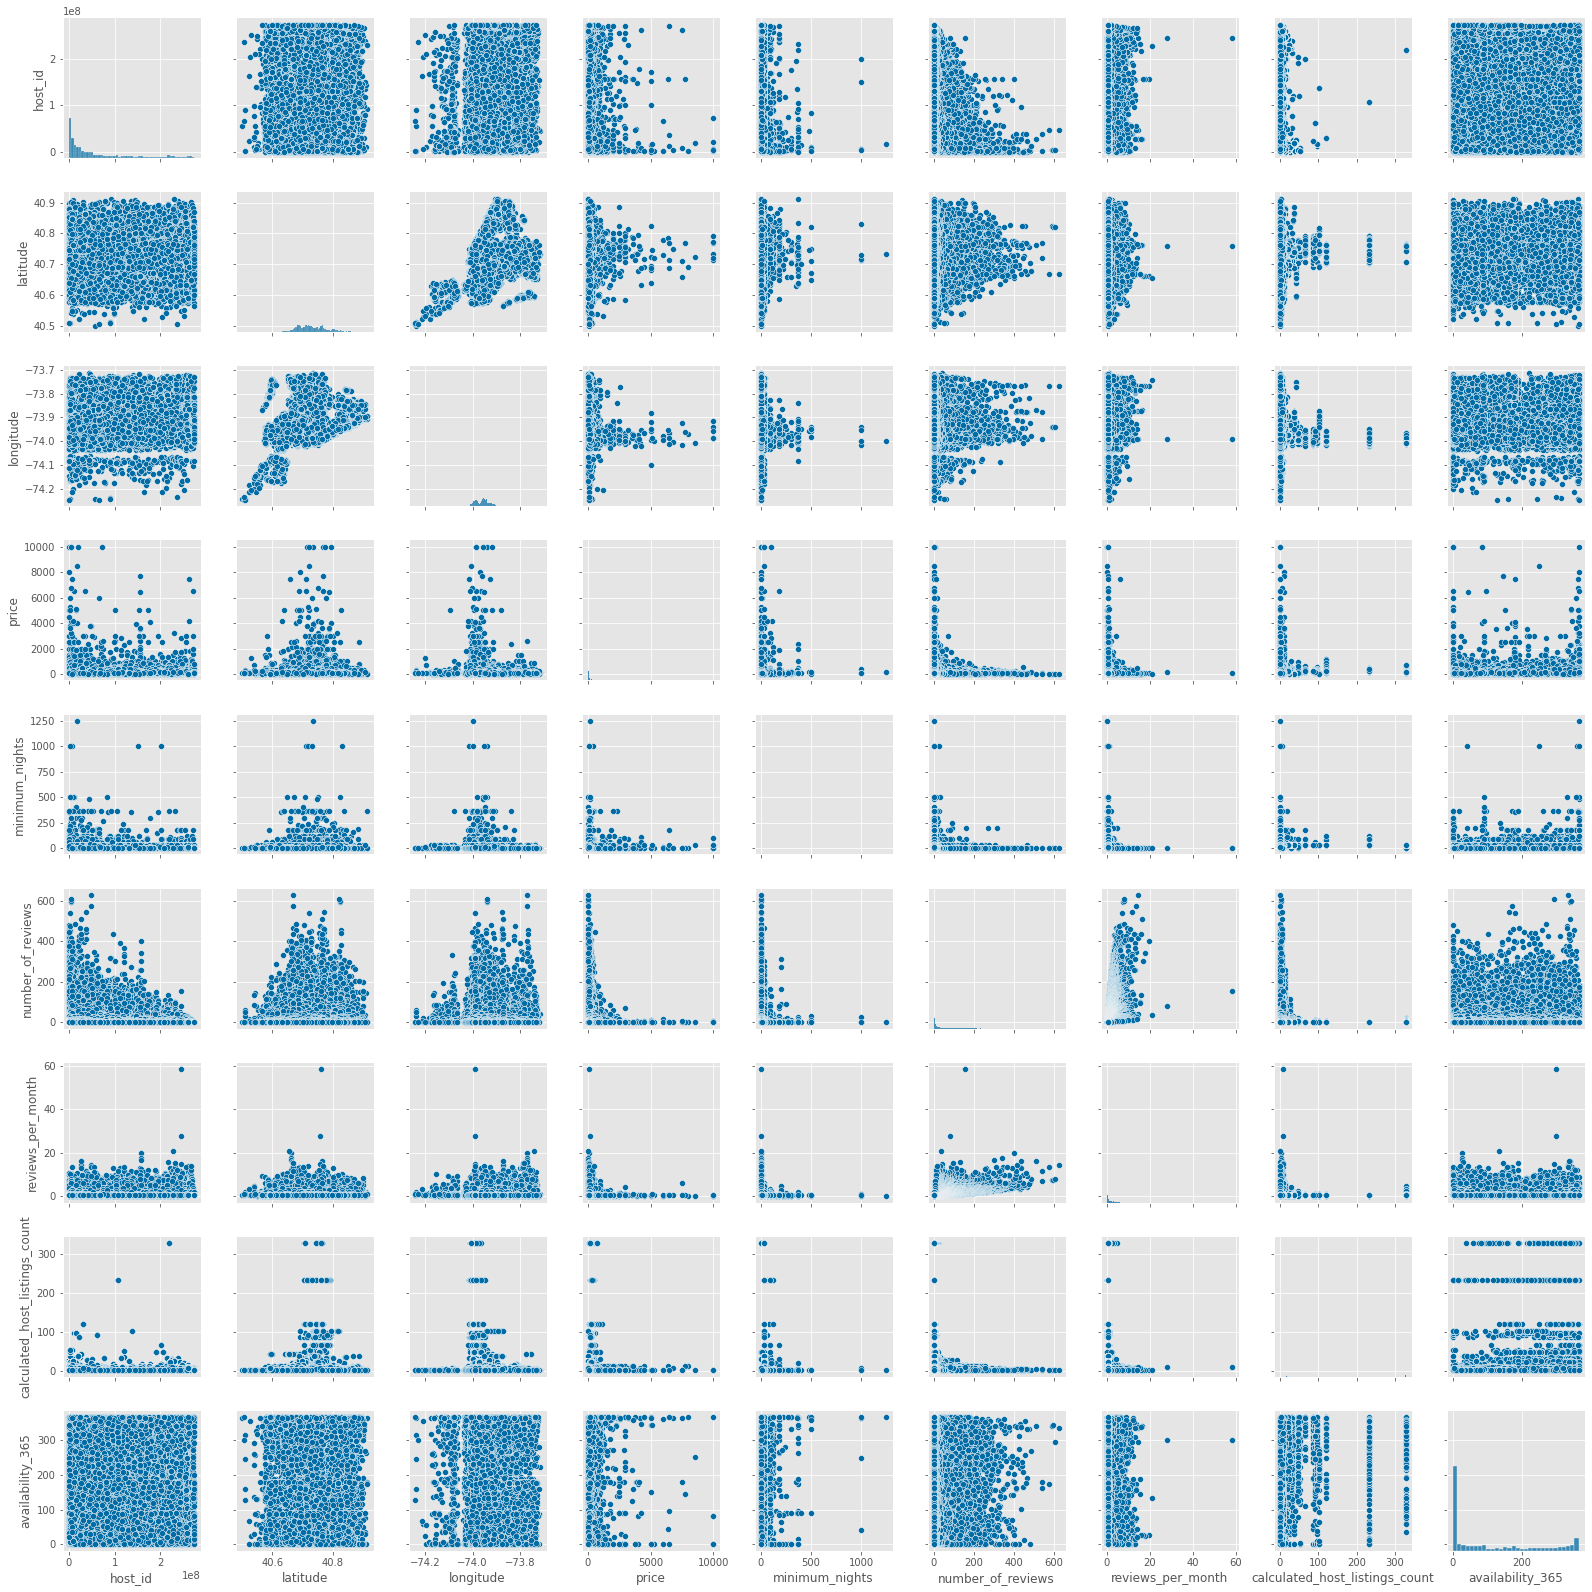

In [27]:
# Pair Plot visualization code
sns.pairplot(newdf)

##### 1. Why did you pick the specific chart?

This chart helps us to see type of relation between each feature.

##### 2. What is/are the insight(s) found from the chart?

No features show linear relationship with each other.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.


*  Bussiest hosts are not able to serve better as they got lesser reviews. Hosts with more properties should be obliged to hire additional host.
*  User experience of Manhatten should be improved. Idea can be taken from Staten Island.


# **Conclusion**

We reached the end of our analysis. There will be more insights that can be generated from this data. For now I am concluding the analysis here. We gained a lot of interesting insights from the data. I was able to find different trends in the data and visualise it for better understanding.

From the analysis we were able to gain several insights.They are given below:
*   We found out that Entire rooms/apartments are the most expensive room types. They are the most popular room type in all the neighbourhood groups except for Manhattan.

*  Manhattan despite being the smallest neighbourhood contains the most number of listings and hence is the densest. Manhattan being popular among tourists is one of the reason behind this. It is the most expensive neighbourhood group too. 6 out of top 10 expensive rooms are also in Manhattan. Manhattan also holds 7 out of top 10 busiest hosts.

*  Queens contain 8 out of top 10 reviewd hosts

*  We found that lesser the number of listings a host has higher the number of reviews they got. Also higher the number of listings lesser the price they kept for their listings.

*  Staten island properties properties are reviewd more(Number of reviews can be taken as a proxy for Number of bookings). Staten island contains a lot of attractive destination for travellers which maybe the reason for the high demand for properties.

*  Shared rooms in Staten Island are less available. Private rooms in Brooklyn and Manhattan also has less availability.

### ***Hurrah! We have successfully completed our EDA Capstone Project !!!***